In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf

import seaborn as sns 

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [3]:
Final = pd.read_csv("Concatnated.csv")

In [4]:
Final.shape

(292986, 447)

In [5]:
Final = np.array(Final[:292000])
print(Final.shape)

(292000, 447)


In [6]:
Final = Final.reshape(-1,1000,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]

In [7]:
print('Old:', Final.shape)
Final = Final.reshape(292000, 447)
print('Updated:',Final.shape)

Old: (292, 1000, 447)
Updated: (292000, 447)


In [8]:
X = Final[:, :446]
y = Final[:,446]

In [9]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(292000, 446)

In [28]:
X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp, :446])
    y_trainX.append(y[timestamp])
    
    if timestamp >= 291999:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))

291990
291990


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [30]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [31]:
X_train.shape

(277400, 446)

In [32]:
pd.value_counts(y_train)

0.0    139200
1.0     46375
2.0     46349
3.0     45476
dtype: int64

In [33]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [34]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 1, 446, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 446, 1))

In [35]:
X_train.shape

(277400, 1, 446, 1)

In [36]:
print(X_train[0])
print('\n')
print(y_train[0])

[[[7.31366464e-02]
  [9.62808231e-03]
  [8.58695517e-03]
  [3.73811935e-02]
  [7.76952412e-03]
  [7.26704796e-03]
  [2.79208773e-03]
  [1.16987178e-02]
  [6.35909536e-03]
  [8.10407703e-03]
  [5.52959639e-02]
  [3.78314016e-04]
  [8.35528792e-03]
  [7.73025512e-03]
  [2.91243253e-04]
  [1.11722689e-01]
  [1.87332686e-03]
  [5.98524747e-04]
  [4.12254513e-04]
  [1.16065641e-02]
  [9.38256412e-03]
  [6.39364795e-02]
  [8.67382124e-03]
  [8.52354922e-02]
  [5.11065419e-03]
  [5.28403634e-03]
  [3.33716263e-02]
  [3.89078579e-02]
  [3.77582333e-01]
  [9.97063411e-03]
  [1.26819344e-01]
  [1.14962091e-01]
  [6.19994531e-02]
  [3.18956927e-01]
  [1.51458550e-01]
  [9.14495970e-02]
  [6.53316527e-02]
  [1.89607755e-03]
  [4.45332670e-02]
  [6.80698475e-03]
  [3.48295917e-03]
  [3.57661748e-03]
  [6.39808193e-05]
  [6.74959244e-04]
  [4.45467553e-03]
  [1.00539329e-02]
  [4.11518404e-04]
  [1.37930944e-03]
  [3.47423672e-02]
  [1.40297101e-01]
  [2.40322647e-01]
  [1.62601740e-01]
  [4.7395657

In [19]:
model = Sequential()
#add model layers
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='leaky_relu', input_shape=(None,1, 446, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='leaky_relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='leaky_relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(200, activation='tanh', return_sequences=True)))
model.add(Dropout(0.25))


model.add(Bidirectional(LSTM(200, activation='tanh', return_sequences=False)))
model.add(Dropout(0.5))


model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=[ 'acc'])

In [20]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="1LSTM_CNN.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [21]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/5
1084/1084 [==============================] - 80s 66ms/step - loss: 0.0218 - acc: 0.9941 - val_loss: 0.0154 - val_acc: 0.9954
Epoch 2/5
1084/1084 [==============================] - 70s 64ms/step - loss: 0.0019 - acc: 0.9993 - val_loss: 0.0706 - val_acc: 0.9775
Epoch 3/5
1084/1084 [==============================] - 70s 65ms/step - loss: 0.0037 - acc: 0.9992 - val_loss: 0.0147 - val_acc: 0.9958
Epoch 4/5
1084/1084 [==============================] - 71s 65ms/step - loss: 8.4787e-04 - acc: 0.9999 - val_loss: 6.5414e-07 - val_acc: 1.0000
Epoch 5/5
1084/1084 [==============================] - 71s 65ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 5.3600e-08 - val_acc: 1.0000


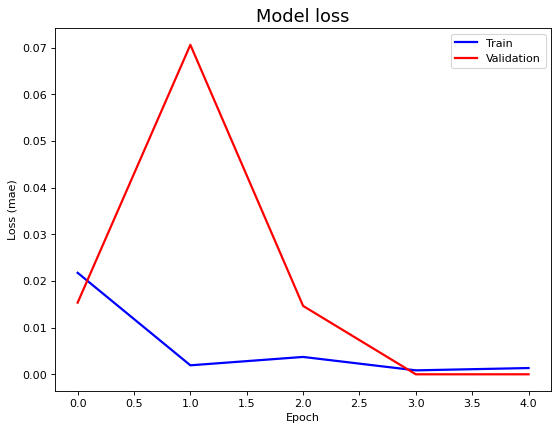

In [22]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [23]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [40]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[7293    0    0    0]
 [   0 2456    0    0]
 [   0    0 2482    0]
 [   0    0    0 2369]]


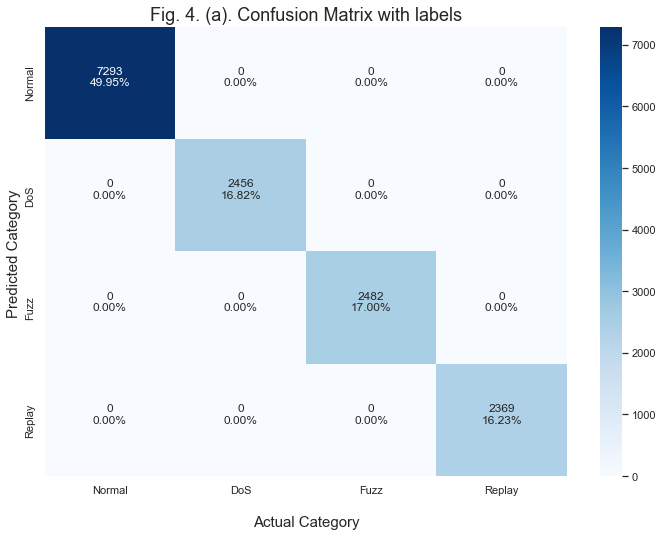

In [41]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Fig. 4. (a). Confusion Matrix with labels', fontsize=18);
ax.set_xlabel('\nActual Category', fontsize=15)
ax.set_ylabel('Predicted Category ', fontsize=15);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"])
ax.yaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [42]:
from sklearn.metrics import classification_report
class_names = ["Normal", "DoS", "Fuzz", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      7293
         DoS       1.00      1.00      1.00      2456
        Fuzz       1.00      1.00      1.00      2482
      Replay       1.00      1.00      1.00      2369

    accuracy                           1.00     14600
   macro avg       1.00      1.00      1.00     14600
weighted avg       1.00      1.00      1.00     14600



ROC AUC score: 1.0


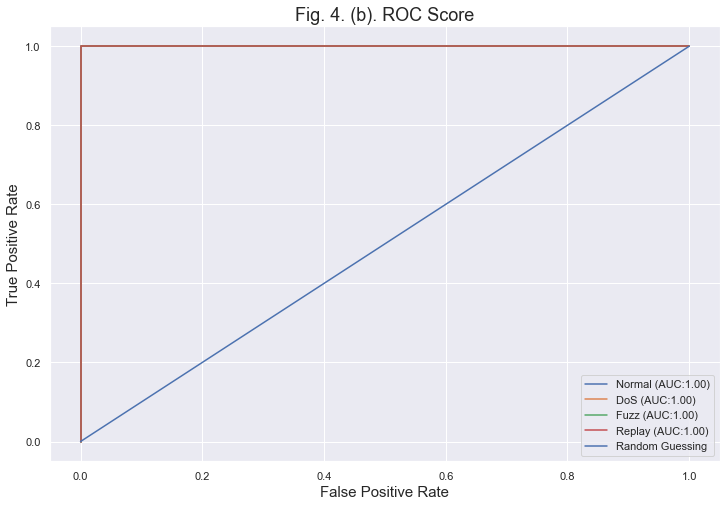

In [43]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "DoS", "Fuzz", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_title('Fig. 4. (b). ROC Score', fontsize=18);
c_ax.set_xlabel('False Positive Rate', fontsize=15)
c_ax.set_ylabel('True Positive Rate', fontsize=15)
plt.show()